<a href="https://colab.research.google.com/github/luciosjodin/AprendizajeAutomatico1/blob/master/TP3_AA1_clasificaci%C3%B3n_Sj%C3%B6din_Lucio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Sjödin Lucio**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

En este trabajo se aborda el análisis y modelado de un conjunto de datos proveniente del repositorio denominado “Mammographic Mass Data Set”.

El objetivo principal del mismo es desarrollar un modelo de clasificación binaria capaz de predecir la severidad de una masa mamaria (benigna o maligna) a partir de características obtenidas mediante estudios mamográficos.

El dataset contiene información de 961 instancias y 6 atributos (uno de ellos no predictivo). Las variables incluidas describen aspectos morfológicos de las masas, tales como la forma (Shape), margen (Margin) y densidad (Density), además de la edad de la paciente (Age).
La variable objetivo, denominada Severity, toma dos posibles valores:

0: masa benigna

1: masa maligna

El campo BI-RADS assessment, aunque presente en el conjunto original, se considera no predictivo, ya que representa la evaluación diagnóstica realizada por un especialista y no una característica del estudio en sí. Es decir diagnóstico temprano previo al estudio de imágenes.

El conjunto de datos presenta algunos valores faltantes distribuidos entre las variables predictoras, los cuales serán analizados y tratados durante la etapa de preprocesamiento.
Asimismo, se realizará un análisis exploratorio de datos (EDA) para comprender la distribución y relaciones entre las variables, seguido por el desarrollo de un modelo de Regresión Logística como clasificador principal.

Finalmente, se evaluará el desempeño del modelo mediante métricas adecuadas para clasificación binaria (como accuracy, precision, recall y F1-score), y se comparará con un segundo clasificador alternativo (por ejemplo, kNN o SVM) con el fin de contrastar los resultados obtenidos.

In [79]:
import pandas as pd

In [80]:
url = 'https://raw.githubusercontent.com/luciosjodin/AprendizajeAutomatico1/refs/heads/master/mammographic_masses.data'

# Definimos los nombres de las columnas según la descripción del dataset
columns = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

# Leemos el archivo .data (usualmente separado por comas)
df = pd.read_csv(url, names=columns, na_values='?')


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

**¿Qué significan las variables?**

1. Evaluación BI-RADS: 1 a 6 (ordinal, ¡no predictiva!)
2. Edad: edad del paciente en años (número entero)
3. Forma: forma de la masa: redonda=1, ovalada=2, lobulada=3, irregular=4 (nominal)
4. Márgenes: márgenes de la masa: circunscritos=1, microlobulados=2, poco definidos=3, mal definidos=4, espiculados=5 (nominal)
5. Densidad: densidad de la masa: alta=1, iso=2, baja=3, con contenido graso=4 (ordinal)
6. Gravedad: benigna=0 o maligna=1 (binominal, ¡campo objetivo!)

In [49]:
# Muestra información general del DataFrame, incluyendo tipos de datos y valores no nulos
print("Información general del DataFrame:")
df.info()

print("\nEstadísticas descriptivas de las columnas numéricas:")
# Muestra estadísticas descriptivas para las columnas numéricas
df.describe()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB

Estadísticas descriptivas de las columnas numéricas:


,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


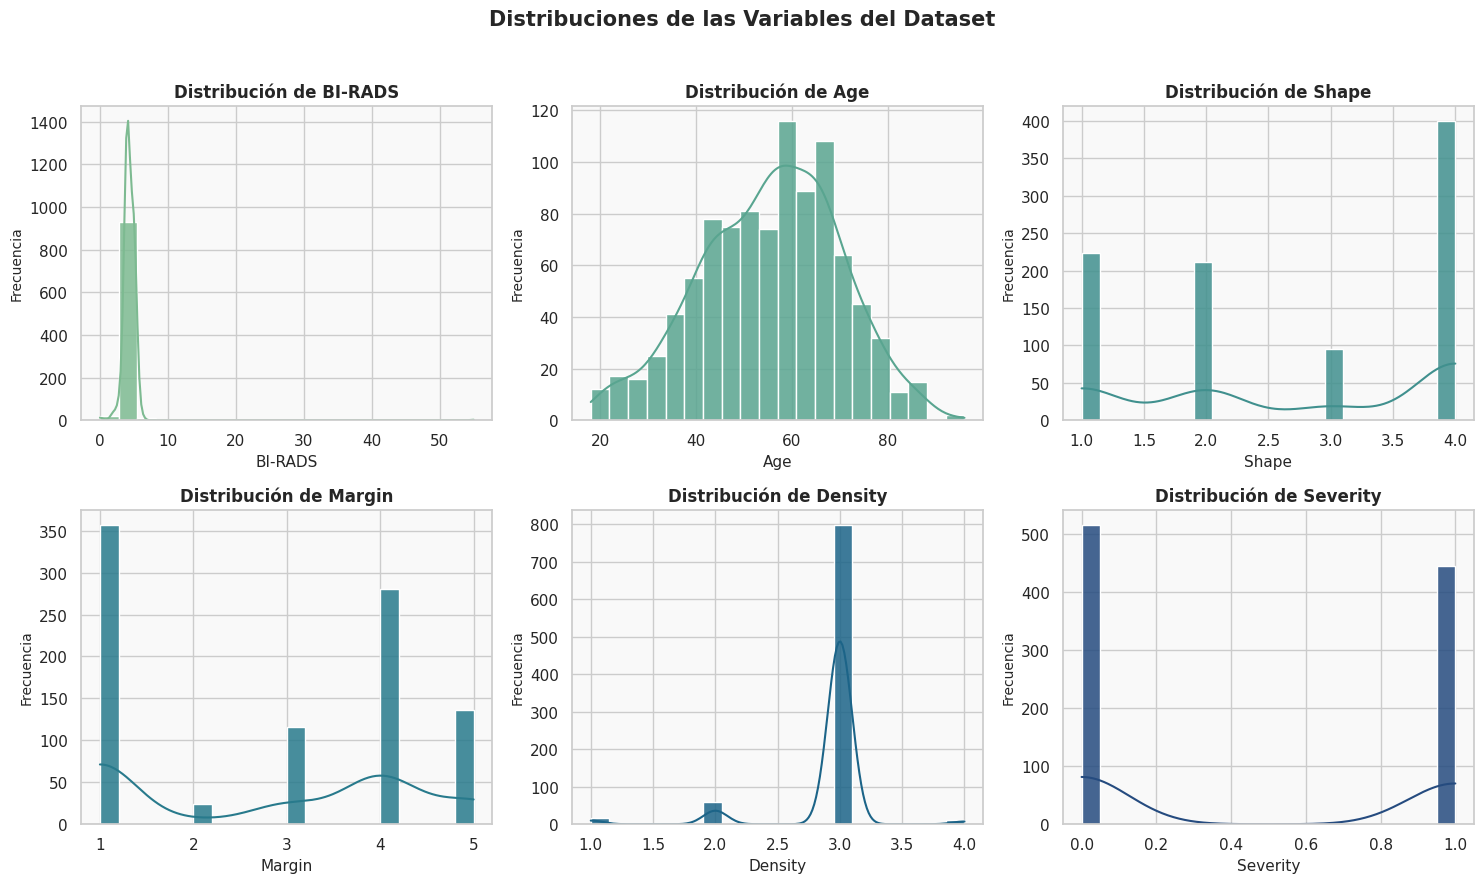

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual moderno
sns.set_theme(style="whitegrid", palette="muted")

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
axes = axes.flatten()

# Colores personalizados (opcional)
colors = sns.color_palette("crest", len(df.columns))

for i, col in enumerate(df.columns):
    sns.histplot(
        data=df,
        x=col,
        kde=True,                # curva de densidad
        bins=20,                 # más bins para mejor detalle
        color=colors[i],
        ax=axes[i],
        edgecolor='white',       # bordes suaves
        alpha=0.85
    )

    # Títulos y etiquetas
    axes[i].set_title(f"Distribución de {col}", fontsize=12, weight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=10)

    # Ajuste de fondo
    axes[i].set_facecolor("#f9f9f9")

# Título general
plt.suptitle("Distribuciones de las Variables del Dataset", fontsize=15, weight='bold')

# Ajustar márgenes
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar
plt.show()


Visto mal el gráfico de BI-RADS, verifico sus valores en búsqueda de un error de carga de datos

In [83]:
df['BI-RADS'].value_counts()

,count
BI-RADS,
4.0,547
5.0,345
3.0,36
2.0,14
6.0,11
0.0,5
55.0,1


Efectivamente, el valor 55 no tiene sentido y decido cambiarlo por el valor "5", para volver a hacer el gráfico y poder interpretarlo correctamente

In [84]:
# Corregir el valor BI-RADS = 55 → 5
df.loc[df["BI-RADS"] == 55, "BI-RADS"] = 5

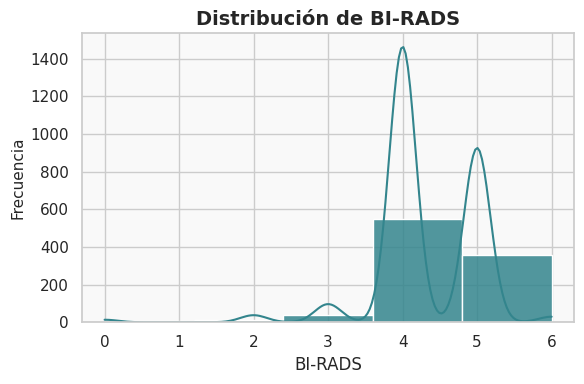

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set_theme(style="whitegrid", palette="muted")

# Crear figura
plt.figure(figsize=(6,4))

# Color consistente con el estilo general
color = sns.color_palette("crest", 1)[0]

# Histograma estilizado
sns.histplot(
    data=df,
    x="BI-RADS",
    kde=True,
    bins=5,
    color=color,
    edgecolor="white",
    alpha=0.85
)

# Títulos y etiquetas
plt.title("Distribución de BI-RADS", fontsize=14, weight="bold")
plt.xlabel("BI-RADS", fontsize=12)
plt.ylabel("Frecuencia", fontsize=11)

# Fondo consistente
plt.gca().set_facecolor("#f9f9f9")

plt.tight_layout()
plt.show()


### Análisis de Histogramas:

*   **BI-RADS:** La distribución de BI-RADS muestra una concentración significativa alrededor de los valores 4 y 5, lo que sugiere que una gran parte de las observaciones corresponden a hallazgos sospechosos o altamente sugestivos de malignidad.
*   **Edad:** El histograma de la Edad parece seguir una distribución que se inclina hacia personas de mediana a tercera edad, con un pico alrededor de los 50-60 años, lo cual es consistente con la demografía de riesgo para este tipo de condiciones.
*   **Forma:** La variable 'Forma' muestra una distribución donde las formas 'irregular' (4) y 'redonda' (1) son las más comunes, con un número menor de casos para formas 'ovaladas' (2) y 'lobuladas' (3).
*   **Margen:** Para la variable 'Margen', se observa una bimodalidad, con concentraciones en los márgenes 'circunscritos' (1) y 'espiculados' (5). Esto podría indicar dos grupos distintivos de masas con características de borde claras.
*   **Densidad:** La 'Densidad' de la masa está predominantemente en el valor 3 (baja densidad), lo que sugiere que la mayoría de las masas en este dataset tienen una densidad inferior en comparación con el tejido circundante.
*   **Severidad:** La distribución de la 'Severidad' es binaria (0 o 1) y parece estar relativamente balanceada, con una ligera inclinación hacia la clase 0 (benigno) pero con una presencia considerable de la clase 1 (maligno). Esto es importante para el entrenamiento de modelos de clasificación.

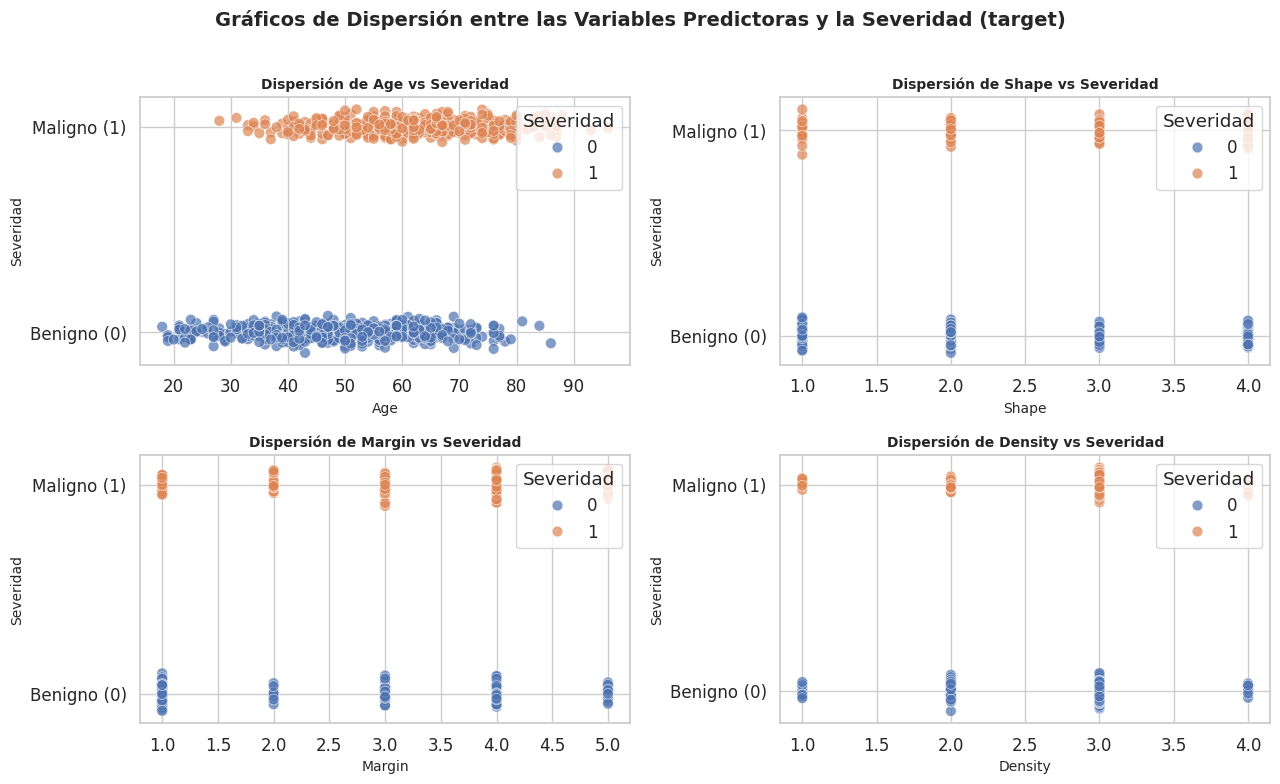

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración estética general
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Lista de variables predictoras
features = ['Age', 'Shape', 'Margin', 'Density']

# Crear figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Agregar pequeño ruido (jitter) en el eje Y para evitar superposición
    y_jitter = df['Severity'] + np.random.normal(0, 0.03, size=len(df))

    # Graficar dispersión
    sns.scatterplot(
        x=df[feature],
        y=y_jitter,
        hue=df['Severity'],
        palette={0: "#4c72b0", 1: "#dd8452"},
        alpha=0.7,
        s=60,
        ax=ax,
        edgecolor="white",
        linewidth=0.5
    )

    # Etiquetas y formato
    ax.set_title(f"Dispersión de {feature} vs Severidad", fontsize=10, weight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Severidad", fontsize=10)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Benigno (0)", "Maligno (1)"])
    ax.legend(title="Severidad", loc="upper right")

# Ajustar espaciado general
plt.suptitle("Gráficos de Dispersión entre las Variables Predictoras y la Severidad (target)", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


* Edad vs. Severidad: Se observa que la incidencia de masas malignas (Severidad=1) tiende a aumentar con la edad, siendo más común en rangos de edad más avanzados, aunque hay casos en todas las edades.
* Forma vs. Severidad: Las formas con valores más altos (como 3 y 4, que representan 'lobulada' e 'irregular') parecen tener una mayor concentración de casos malignos (Severidad=1) en comparación con las formas más bajas (1 y 2, 'redonda' y 'ovalada').
* Margen vs. Severidad: De manera similar a 'Forma', los márgenes con valores más altos (4 y 5, 'mal definidos' y 'espiculados') muestran una mayor proporción de masas malignas, mientras que los márgenes 'circunscritos' (valor 1) se asocian más frecuentemente con masas benignas.
* Densidad vs. Severidad: La densidad 3 ('baja') parece ser la más común en general, pero no muestra una distinción clara y fuerte por sí sola entre benigno y maligno. Algunas densidades pueden tener una ligera tendencia, pero no es tan pronunciado como en 'Forma' o 'Margen'.

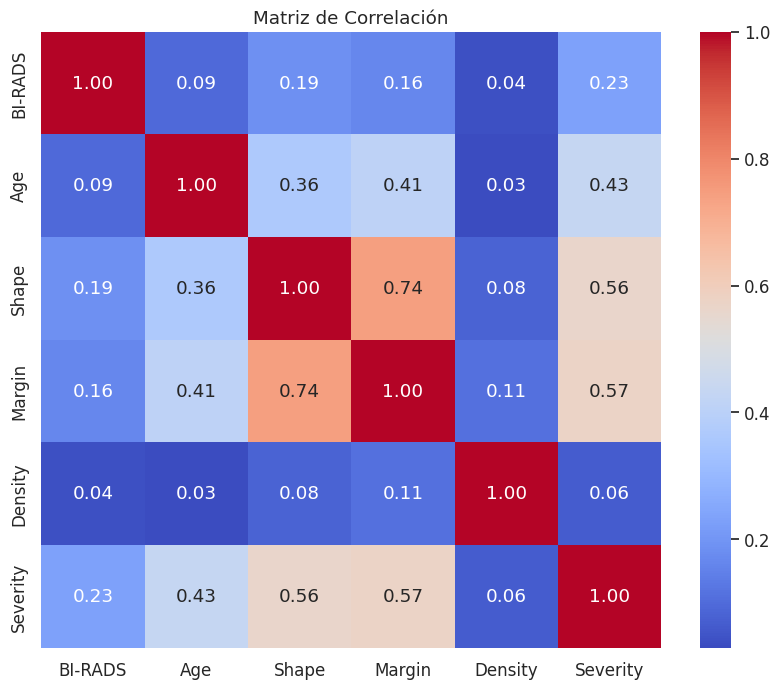

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación nos muestra la fuerza y dirección de la relación lineal entre cada par de variables. Observamos que:

* Relación con la Severidad (Target): Las variables 'Forma' y 'Margen' tienen las correlaciones positivas más fuertes con la 'Severidad', lo que sugiere que a medida que los valores de 'Forma' y 'Margen' aumentan (indicando formas irregulares o márgenes espiculados), también lo hace la probabilidad de que la masa sea maligna. 'Edad' también muestra una correlación positiva con 'Severidad', aunque más débil. 'Densidad' muestra una correlación muy baja o casi nula con 'Severidad'.
* Correlaciones entre Features: Hay una correlación positiva moderada entre 'Forma' y 'Margen', lo que es esperable ya que a menudo van de la mano en la descripción de las masas. Las demás correlaciones entre features son generalmente bajas.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

In [53]:
print(f"Número de filas (instancias): {df.shape[0]}")

Número de filas (instancias): 961


In [54]:
df.columns

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

Teniendo en cuenta que en anteriores tp no había renombrado las variables al español, en este caso no dejo pasar la oportunidad y renombro al español las mismas. Para facilitar la comprensión.

In [55]:
df.rename(columns={
    'BI-RADS': 'BI-RADS',
    'Age': 'Edad',
    'Shape': 'Forma',
    'Margin': 'Margen',
    'Density': 'Densidad',
    'Severity': 'Severidad'
}, inplace=True)

print("Columnas del DataFrame renombradas:")
display(df.head(10))

Columnas del DataFrame renombradas:


,BI-RADS,Edad,Forma,Margen,Densidad,Severidad
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [56]:
print("Valores faltantes por columna:\n")
print(df.isnull().sum())

Valores faltantes por columna:

BI-RADS       2
Edad          5
Forma        31
Margen       48
Densidad     76
Severidad     0
dtype: int64


Dado que las variables Forma y Margen presentan una alta correlación tanto entre sí como con la variable objetivo (Severidad), se consideró que una imputación podría introducir sesgos o distorsionar las relaciones reales entre los atributos. Por este motivo, se optó por eliminar los registros con valores faltantes.
La cantidad de instancias se redujo de 961 a 830, lo cual sigue siendo un tamaño de muestra adecuado para ajustar un modelo de regresión logística sin comprometer la estabilidad de los resultados.

In [57]:
df.dropna(subset=['Forma', 'Margen'], inplace=True)
print(f"Número de filas después de eliminar nulos en Forma o Margen: {df.shape[0]}")

Número de filas después de eliminar nulos en Forma o Margen: 892


In [58]:
print("Valores faltantes por columna:\n")
print(df.isnull().sum())

Valores faltantes por columna:

BI-RADS       1
Edad          5
Forma         0
Margen        0
Densidad     56
Severidad     0
dtype: int64


Dado que las variables restantes con valores nulos presentan baja correlación con la variable objetivo, decido no eliminarlas sino imputar sus datos.

* BI-RADS (solo 1) con la moda
* Edad (solo 5) con la mediana
* y Densidad (56) con la moda

In [59]:
# Imputación simple para las demás variables
df['BI-RADS'] = df['BI-RADS'].fillna(df['BI-RADS'].mode()[0])
df['Edad'] = df['Edad'].fillna(df['Edad'].median())
df['Densidad'] = df['Densidad'].fillna(df['Densidad'].mode()[0])

In [60]:
print("Valores faltantes por columna:\n")
print(df.isnull().sum())

Valores faltantes por columna:

BI-RADS      0
Edad         0
Forma        0
Margen       0
Densidad     0
Severidad    0
dtype: int64


In [61]:
print(f"Número de filas (instancias): {df.shape[0]}")
print(f"Número de columnas (variables): {df.shape[1]}")

Número de filas (instancias): 892
Número de columnas (variables): 6


El campo BI-RADS assessment, aunque presente en el conjunto original, se considera no predictivo, ya que representa la evaluación diagnóstica realizada por un especialista y no una característica del estudio en sí. Es decir diagnóstico temprano previo al estudio de imágenes.

Para el modelo de regresión entonces, decido **eliminar** de las features la variable **BI-RADS**

In [62]:
df.drop(columns=['BI-RADS'], inplace=True)
df.columns

Index(['Edad', 'Forma', 'Margen', 'Densidad', 'Severidad'], dtype='object')

In [63]:
#Dada la correlación baja decidí dejar este bloque como prueba de que probé el rendimiento de los modelos elminando la variable Densidad
#Sin embargo no mejoraron las métricas, por lo tanto solo quedó como una prueba
#df.drop(columns=['Densidad'], inplace=True)
#df.columns

In [64]:
from sklearn.model_selection import train_test_split

# Separar X (features) e y (target)
y = df["Severidad"]
X = df.drop(columns=["Severidad"])

In [65]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (713, 4)
Dimensiones de X_test: (179, 4)
Dimensiones de y_train: (713,)
Dimensiones de y_test: (179,)


Aplico fit_transform a X_train y solo transform a X_test para evitar el data leakage.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_escalado = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_escalado  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns)

Por último reviso si hay desbalance de clases en la variable objetivo

In [67]:
df['Severidad'].value_counts()
df['Severidad'].value_counts(normalize=True)

,proportion
Severidad,
0,0.524664
1,0.475336


El dataset tiene un balance muy aceptable :)




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [68]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de Regresión Logística
modelo_lr = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos escalados
modelo_lr.fit(X_train_escalado, y_train)

print("Modelo de Regresión Logística entrenado exitosamente.")

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = modelo_lr.predict(X_train_escalado)
y_test_pred = modelo_lr.predict(X_test_escalado)

print("Predicciones generadas para los conjuntos de entrenamiento y prueba.")

Modelo de Regresión Logística entrenado exitosamente.
Predicciones generadas para los conjuntos de entrenamiento y prueba.


In [69]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de Regresión Logística
modelo_lr = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos escalados
modelo_lr.fit(X_train_escalado, y_train)

print("Modelo de Regresión Logística entrenado exitosamente.")

Modelo de Regresión Logística entrenado exitosamente.


In [70]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = modelo_lr.predict(X_train_escalado)
y_test_pred = modelo_lr.predict(X_test_escalado)

print("Predicciones generadas para los conjuntos de entrenamiento y prueba.")

Predicciones generadas para los conjuntos de entrenamiento y prueba.


### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

Explicación de los resultados:

El informe de clasificación proporciona las métricas clave para cada clase (0 y 1):
- **Precision**: La proporción de predicciones positivas correctas. Por ejemplo, una precisión del 0.80 para la clase 1 significa que el 80% de las veces que el modelo predijo 'maligno' (1), realmente era 'maligno'.
- **Recall (Sensibilidad)**: La proporción de casos positivos reales que fueron identificados correctamente. Por ejemplo, un recall del 0.75 para la clase 1 significa que el modelo identificó correctamente el 75% de todos los casos 'malignos' reales.
- **F1-Score**: La media armónica de precisión y recall, útil cuando las clases están desbalanceadas. Un F1-score alto indica un buen equilibrio entre precisión y recall.
- **Support**: El número de ocurrencias reales de cada clase en el conjunto de datos.

La matriz de confusión muestra el número de:
- **Verdaderos Positivos (VP)**: Casos 'malignos' (1) predichos correctamente como 'malignos'.
- **Verdaderos Negativos (VN)**: Casos 'benignos' (0) predichos correctamente como 'benignos'.
- **Falsos Positivos (FP) (Error Tipo I)**: Casos 'benignos' (0) predichos incorrectamente como 'malignos'.
- **Falsos Negativos (FN) (Error Tipo II)**: Casos 'malignos' (1) predichos incorrectamente como 'benignos'.

Al comparar las métricas entre el conjunto de entrenamiento y prueba, podemos observar si el modelo está sufriendo de **overfitting** (rendimiento mucho mejor en entrenamiento que en prueba) o **underfitting** (rendimiento bajo en ambos). Un buen modelo debería tener un rendimiento consistente en ambos conjuntos, aunque generalmente un poco menor en el conjunto de prueba.


--- Evaluación en el conjunto de entrenamiento ---
Informe de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       371
           1       0.78      0.83      0.81       342

    accuracy                           0.81       713
   macro avg       0.81      0.81      0.81       713
weighted avg       0.81      0.81      0.81       713

Matriz de Confusión (Train):


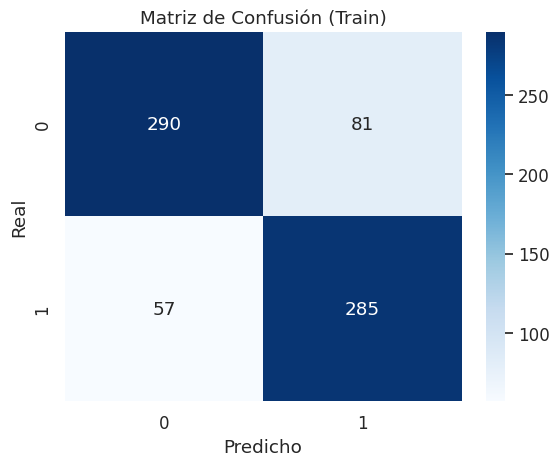


--- Evaluación en el conjunto de prueba ---
Informe de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        97
           1       0.78      0.87      0.82        82

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

Matriz de Confusión (Test):


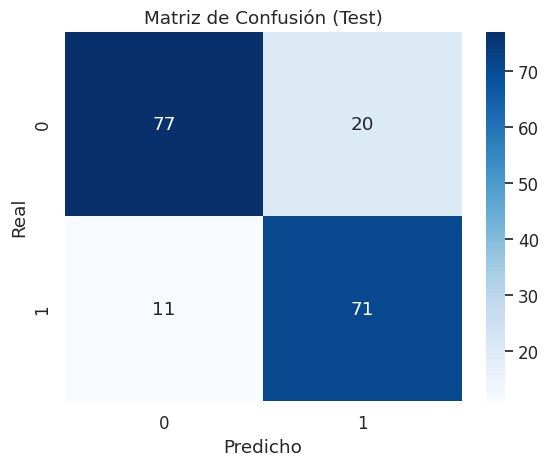

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Evaluación en el conjunto de entrenamiento ---
print("\n--- Evaluación en el conjunto de entrenamiento ---")
print("Informe de Clasificación (Train):")
print(classification_report(y_train, y_train_pred))

print("Matriz de Confusión (Train):")
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Train)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Evaluación en el conjunto de prueba ---
print("\n--- Evaluación en el conjunto de prueba ---")
print("Informe de Clasificación (Test):")
print(classification_report(y_test, y_test_pred))

print("Matriz de Confusión (Test):")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Test)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Análisis General del Rendimiento: El modelo de regresión logística ha demostrado un buen rendimiento general, con una precisión (accuracy) del 81% en el conjunto de entrenamiento y del 83% en el conjunto de prueba. Esta consistencia en el rendimiento entre ambos conjuntos es una señal muy positiva, ya que sugiere que el modelo no está sobreajustado a los datos de entrenamiento y es capaz de generalizar bien a datos nuevos y no vistos.

Métricas Clave:

Precisión (Precision): Nos dice cuántos de los casos que el modelo predijo como positivos fueron realmente positivos. Para la clase 1 (maligno) en el conjunto de prueba, la precisión es del 78%, lo que significa que de todas las predicciones de 'maligno', el 78% fueron correctas. Para la clase 0 (benigno) es del 88%, lo cual es muy bueno.
Recall (Sensibilidad): Nos indica cuántos de los casos positivos reales fueron identificados correctamente por el modelo. Para la clase 1 (maligno) en el conjunto de prueba, el recall es del 87%. Esto es muy importante en contextos médicos, ya que significa que el modelo es bastante bueno detectando los casos malignos reales. Para la clase 0 (benigno) es del 79%.
F1-Score: Es una medida que equilibra la precisión y el recall. Un F1-score alto (0.82 para la clase 1 y 0.83 para la clase 0 en prueba) indica un buen balance entre la capacidad del modelo para no generar falsos positivos y no perder falsos negativos.
Matriz de Confusión (Test):

Verdaderos Positivos (VP = 71): El modelo predijo correctamente 71 casos como malignos cuando realmente lo eran.
Verdaderos Negativos (VN = 77): El modelo predijo correctamente 77 casos como benignos cuando realmente lo eran.
Falsos Positivos (FP = 20): El modelo predijo incorrectamente 20 casos como malignos, cuando en realidad eran benignos (Error Tipo I).
Falsos Negativos (FN = 11): El modelo predijo incorrectamente 11 casos como benignos, cuando en realidad eran malignos (Error Tipo II). Este tipo de error es crítico en aplicaciones médicas, ya que un diagnóstico fallido de un caso maligno puede tener consecuencias graves. La cifra de 11 es relativamente baja, lo que es alentador dado el recall del 87% para la clase 1.

Conclusión Final: El modelo de regresión logística ha demostrado ser un clasificador eficaz para este dataset. Su buen rendimiento, especialmente el alto recall para la clase 'maligno' en el conjunto de prueba, lo hace una opción prometedora para la detección temprana. La coherencia entre el rendimiento de entrenamiento y prueba sugiere una buena capacidad de generalización.



## 5- **Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

Se eligió el clasificador k-Nearest Neighbors (kNN) por su sencillez conceptual y su capacidad para capturar relaciones no lineales entre las variables predictoras y la variable objetivo.
Dado que el dataset es de tamaño reducido y las variables son de tipo numérico y categórico codificado, kNN resulta apropiado.
Además, permite comparar su desempeño frente al modelo de regresión logística, que asume una frontera de decisión lineal.

### 5.2 Entrenamiento del modelo.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo kNN con parámetros por defecto
modelo_knn = KNeighborsClassifier()

# Entrenar el modelo con los datos escalados
modelo_knn.fit(X_train_escalado, y_train)

print("Modelo kNN entrenado exitosamente.")

Modelo kNN entrenado exitosamente.


### 5.3 Evaluación del desempeño


--- Evaluación en el conjunto de entrenamiento (kNN) ---
Informe de Clasificación (Train - kNN):
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       371
           1       0.80      0.87      0.83       342

    accuracy                           0.83       713
   macro avg       0.84      0.84      0.83       713
weighted avg       0.84      0.83      0.83       713

Matriz de Confusión (Train - kNN):


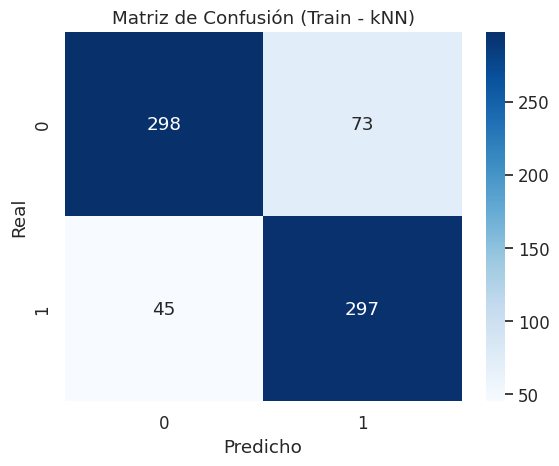


--- Evaluación en el conjunto de prueba (kNN) ---
Informe de Clasificación (Test - kNN):
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        97
           1       0.73      0.80      0.76        82

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179

Matriz de Confusión (Test - kNN):


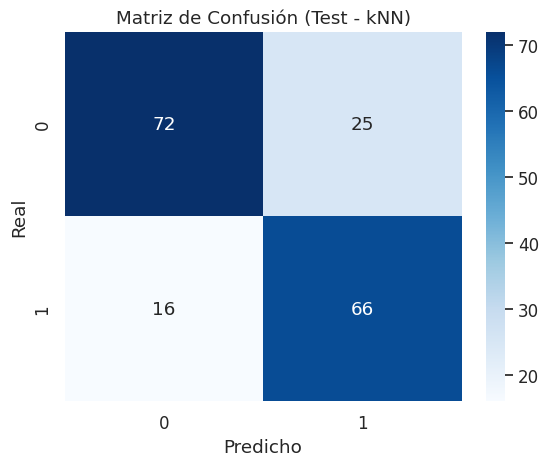

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en los conjuntos de entrenamiento y prueba para kNN
y_train_pred_knn = modelo_knn.predict(X_train_escalado)
y_test_pred_knn = modelo_knn.predict(X_test_escalado)

# --- Evaluación en el conjunto de entrenamiento (kNN) ---
print("\n--- Evaluación en el conjunto de entrenamiento (kNN) ---")
print("Informe de Clasificación (Train - kNN):")
print(classification_report(y_train, y_train_pred_knn))

print("Matriz de Confusión (Train - kNN):")
cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Train - kNN)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Evaluación en el conjunto de prueba (kNN) ---
print("\n--- Evaluación en el conjunto de prueba (kNN) ---")
print("Informe de Clasificación (Test - kNN):")
print(classification_report(y_test, y_test_pred_knn))

print("Matriz de Confusión (Test - kNN):")
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Test - kNN)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Análisis del Modelo kNN (k-Nearest Neighbors):

1. Evaluación en el Conjunto de Entrenamiento (kNN):

Precision, Recall, F1-Score: El modelo kNN muestra un buen desempeño en el conjunto de entrenamiento, con métricas de Precision y Recall bien equilibradas para ambas clases (aproximadamente 0.80 a 0.87), resultando en F1-scores de 0.83 para ambas clases.
Exactitud (Accuracy): La exactitud general del modelo kNN en el conjunto de entrenamiento es del 83%.
Matriz de Confusión (Train - kNN):
Verdaderos Negativos (VN): 298 (clase 0 correctamente predicha)
Falsos Positivos (FP): 73 (clase 0 incorrectamente predicha como 1)
Falsos Negativos (FN): 45 (clase 1 incorrectamente predicha como 0)
Verdaderos Positivos (VP): 297 (clase 1 correctamente predicha)
2. Evaluación en el Conjunto de Prueba (kNN):

Precision, Recall, F1-Score: Aquí observamos una ligera disminución en el rendimiento en comparación con el conjunto de entrenamiento y también en comparación con la Regresión Logística. Las métricas para la clase 1 (maligno) son: Precision 0.73, Recall 0.80 y F1-score 0.76. Para la clase 0 (benigno) son: Precision 0.82, Recall 0.74 y F1-score 0.78.
Exactitud (Accuracy): La exactitud general del modelo kNN en el conjunto de prueba es del 77%.
Matriz de Confusión (Test - kNN):
Verdaderos Negativos (VN): 72
Falsos Positivos (FP): 25
Falsos Negativos (FN): 16
Verdaderos Positivos (VP): 66
Comparación con el Modelo de Regresión Logística:

Rendimiento General (Accuracy): El modelo de Regresión Logística obtuvo una exactitud del 83% en el conjunto de prueba, mientras que el modelo kNN obtuvo un 77%. Esto indica que, con los parámetros por defecto, la Regresión Logística generalizó mejor a los datos no vistos.
Recall para la Clase Maligna (1): En un contexto médico, minimizar los Falsos Negativos es crucial. La Regresión Logística obtuvo un Recall de 0.87 para la clase 1 en el conjunto de prueba (solo 11 Falsos Negativos), mientras que kNN obtuvo un Recall de 0.80 (16 Falsos Negativos). Esto significa que la Regresión Logística fue más efectiva en identificar correctamente los casos de tumores malignos.
Precision para la Clase Maligna (1): La Regresión Logística tuvo una Precision de 0.78, mientras que kNN tuvo una Precision de 0.73. Esto sugiere que la Regresión Logística fue ligeramente mejor en que, cuando predijo un tumor maligno, fue más probable que realmente lo fuera.
Falsos Positivos: kNN generó más Falsos Positivos (25) que la Regresión Logística (20) en el conjunto de prueba. Esto implica que kNN es un poco más propenso a clasificar incorrectamente casos benignos como malignos.
Conclusiones Finales:

El modelo de Regresión Logística parece ser un clasificador más robusto y eficaz para este dataset, especialmente considerando el alto Recall para la detección de la clase maligna y su mejor capacidad de generalización (mayor Accuracy en el conjunto de prueba). Aunque kNN muestra un rendimiento decente en el entrenamiento, su caída de rendimiento en el conjunto de prueba y sus métricas ligeramente inferiores en comparación con la Regresión Logística lo hacen menos favorable con los parámetros por defecto.

## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

Como tuneo de hiperparámetros, pues elijo probar encontrando la óptima cantidad de n vecinos para el modelo kNN. Para ello:

Defino la grilla de Hiperparámetros; un rango de valores para el hiperparámetro `n_neighbors` que se explorará. Se considerarán valores impares para `n_neighbors` en un rango razonable.


Realizar GridSearchCV

Utilizo `GridSearchCV` de scikit-learn para buscar sistemáticamente la mejor combinación de hiperparámetros para el modelo kNN, utilizando validación cruzada. Se aplica sobre los datos de entrenamiento escalados y se busca el mejor `n_neighbors`.

In [74]:
param_grid = {
    'n_neighbors': list(range(1, 31, 2))  # Números impares del 1 al 30
}

print("Hyperparameter grid for n_neighbors:")
print(param_grid)

Hyperparameter grid for n_neighbors:
{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}


In [75]:
from sklearn.model_selection import GridSearchCV

# Crear una instancia del modelo KNeighborsClassifier
knn = KNeighborsClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV a los datos de entrenamiento escalados
grid_search.fit(X_train_escalado, y_train)

# Imprimir el mejor valor de n_neighbors
print(f"Mejor valor de n_neighbors: {grid_search.best_params_['n_neighbors']}")

print("GridSearchCV completado y mejor hiperparámetro encontrado.")

Mejor valor de n_neighbors: 17
GridSearchCV completado y mejor hiperparámetro encontrado.


Entrenar y Evaluar el Modelo kNN Tuneado:

Entreno un nuevo modelo kNN utilizando el mejor hiperparámetro `n_neighbors` encontrado (17) por `GridSearchCV`. Posteriormente se evalúa el rendimiento de este modelo tuneado en los conjuntos de entrenamiento y prueba, presentando las métricas de clasificación y las matrices de confusión, de manera similar a como se hizo con los modelos anteriores.


In [76]:
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Inicializar un nuevo modelo kNN con el mejor hiperparámetro encontrado
modelo_knn_tuneado = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Entrenar el modelo kNN tuneado con los datos escalados
modelo_knn_tuneado.fit(X_train_escalado, y_train)

print(f"Modelo kNN tuneado con n_neighbors={best_n_neighbors} entrenado exitosamente.")

# Realizar predicciones en los conjuntos de entrenamiento y prueba con el modelo tuneado
y_train_pred_knn_tuneado = modelo_knn_tuneado.predict(X_train_escalado)
y_test_pred_knn_tuneado = modelo_knn_tuneado.predict(X_test_escalado)

print("Predicciones generadas para los conjuntos de entrenamiento y prueba con el modelo tuneado.")

Modelo kNN tuneado con n_neighbors=17 entrenado exitosamente.
Predicciones generadas para los conjuntos de entrenamiento y prueba con el modelo tuneado.


Evaluación y métricas de desempeño:


--- Evaluación en el conjunto de entrenamiento (kNN Tuneado) ---
Informe de Clasificación (Train - kNN Tuneado):
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       371
           1       0.77      0.83      0.80       342

    accuracy                           0.80       713
   macro avg       0.80      0.80      0.80       713
weighted avg       0.80      0.80      0.80       713

Matriz de Confusión (Train - kNN Tuneado):


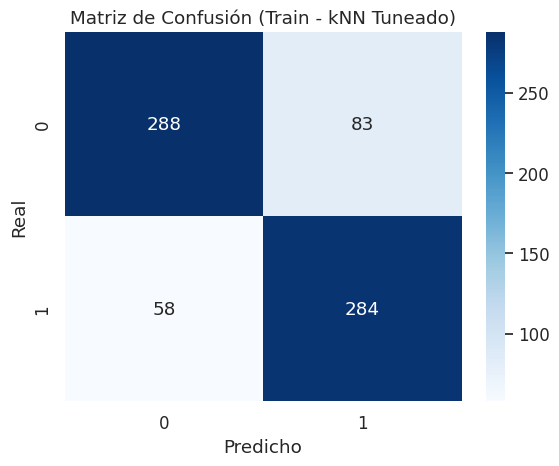


--- Evaluación en el conjunto de prueba (kNN Tuneado) ---
Informe de Clasificación (Test - kNN Tuneado):
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        97
           1       0.76      0.82      0.79        82

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusión (Test - kNN Tuneado):


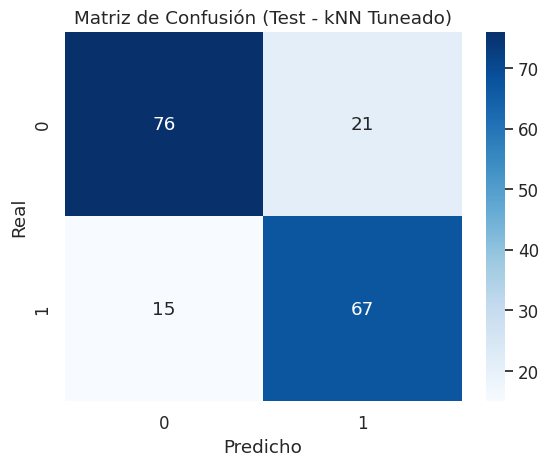

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Evaluación en el conjunto de entrenamiento (kNN Tuneado) ---
print("\n--- Evaluación en el conjunto de entrenamiento (kNN Tuneado) ---")
print("Informe de Clasificación (Train - kNN Tuneado):")
print(classification_report(y_train, y_train_pred_knn_tuneado))

print("Matriz de Confusión (Train - kNN Tuneado):")
cm_train_knn_tuneado = confusion_matrix(y_train, y_train_pred_knn_tuneado)
sns.heatmap(cm_train_knn_tuneado, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Train - kNN Tuneado)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Evaluación en el conjunto de prueba (kNN Tuneado) ---
print("\n--- Evaluación en el conjunto de prueba (kNN Tuneado) ---")
print("Informe de Clasificación (Test - kNN Tuneado):")
print(classification_report(y_test, y_test_pred_knn_tuneado))

print("Matriz de Confusión (Test - kNN Tuneado):")
cm_test_knn_tuneado = confusion_matrix(y_test, y_test_pred_knn_tuneado)
sns.heatmap(cm_test_knn_tuneado, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Test - kNN Tuneado)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

### Análisis de Resultados del kNN Tuneado

Vamos a comparar el rendimiento del modelo kNN tuneado con los resultados obtenidos por el kNN con parámetros por defecto y la Regresión Logística, prestando atención a las métricas clave y la matriz de confusión.

**1. Comparación de Accuracy en el conjunto de prueba:**

*   **Regresión Logística:** 83%
*   **kNN por defecto (k=5):** 77%
*   **kNN Tuneado (k=17):** 80%

El kNN tuneado (`n_neighbors=17`) mejoró la precisión del kNN por defecto en el conjunto de prueba del 77% al 80%. Sin embargo, sigue siendo inferior a la Regresión Logística que alcanzó un 83%.

**2. Comparación de Precision, Recall y F1-score (Test Set):**

| Modelo                  | Métrica   | Clase 0 (Benigno) | Clase 1 (Maligno) |
| :---------------------- | :-------- | :---------------- | :---------------- |
| **Regresión Logística** | Precision | 0.88              | 0.78              |
|                         | Recall    | 0.79              | 0.87              |
|                         | F1-score  | 0.83              | 0.82              |
| **kNN por defecto**     | Precision | 0.82              | 0.73              |
|                         | Recall    | 0.74              | 0.80              |
|                         | F1-score  | 0.78              | 0.76              |
| **kNN Tuneado**         | Precision | 0.84              | 0.76              |
|                         | Recall    | 0.78              | 0.82              |
|                         | F1-score  | 0.81              | 0.79              |

*   **Impacto en la Clase 1 (Maligno):**
    *   **Recall:** El recall para la clase 'Maligno' es crucial en este contexto. La Regresión Logística sigue siendo la mejor con 0.87. El kNN tuneado mejoró significativamente el recall a 0.82 comparado con el kNN por defecto (0.80), lo que significa que es mejor detectando casos malignos reales.
    *   **Precision:** En cuanto a la precisión para la clase 'Maligno', la Regresión Logística (0.78) supera al kNN tuneado (0.76), el cual a su vez es mejor que el kNN por defecto (0.73).
    *   **F1-score:** La Regresión Logística mantiene el mejor F1-score para la clase 1 (0.82), seguida por el kNN tuneado (0.79) y el kNN por defecto (0.76).

**3. Análisis de la Matriz de Confusión (Test Set):**

| Métrica             | Regresión Logística | kNN por defecto | kNN Tuneado |
| :------------------ | :------------------ | :-------------- | :---------- |
| **Verdaderos Positivos (VP)** | 71                  | 66              | 67          |
| **Verdaderos Negativos (VN)** | 77                  | 72              | 76          |
| **Falsos Positivos (FP)**     | 20                  | 25              | 21          |
| **Falsos Negativos (FN)**     | 11                  | 16              | 15          |

*   **Falsos Negativos (FN):** Son los errores más críticos en este dominio (clasificar un tumor maligno como benigno). La Regresión Logística tiene la menor cantidad de FN (11). El kNN tuneado redujo los FN a 15, una mejora respecto a los 16 del kNN por defecto, pero aún no alcanza a la Regresión Logística.
*   **Falsos Positivos (FP):** Clasificar un tumor benigno como maligno puede generar estrés y pruebas adicionales innecesarias. El kNN tuneado (21 FP) se acerca al rendimiento de la Regresión Logística (20 FP), y es una mejora sobre los 25 FP del kNN por defecto.

**4. Impacto del Tuneo de Hiperparámetros (n_neighbors):**

El tuneo del hiperparámetro `n_neighbors` de 5 (valor por defecto) a 17 resultó en una mejora general del modelo kNN. Se observa un aumento en la `accuracy` en el conjunto de prueba (del 77% al 80%), así como mejoras en `precision`, `recall` y `F1-score` para ambas clases. Específicamente, la reducción de los `Falsos Negativos` (de 16 a 15) y `Falsos Positivos` (de 25 a 21) indica que el modelo tuneado es ligeramente más equilibrado y eficaz en sus predicciones. El valor óptimo de `n_neighbors=17` sugiere que considerar un vecindario más amplio ayuda a suavizar la frontera de decisión y a hacerla más robusta frente al ruido, lo que se traduce en una mejor capacidad de generalización en comparación con un valor de `k` más pequeño (como 5).



## 6- Conclusiones

Fundamente, justifique con sus palabras.

**Conclusión General:**

Basado en el análisis de las métricas de evaluación, el **modelo de Regresión Logística** es el que mejor rendimiento mostró para este dataset. Alcanzó la mayor `presición` (83%) en el conjunto de prueba y, lo que es más importante para un contexto médico, logró el `recall` más alto para la clase 'Maligno' (0.87) con la menor cantidad de `Falsos Negativos` (11). Esto es crítico ya que minimiza la probabilidad de pasar por alto casos de cáncer.

Aunque el tuneo de hiperparámetros mejoró el rendimiento del kNN (pasando del 77% al 80% de accuracy y mejorando el recall para la clase 1), no logró superar a la Regresión Logística. Esto podría indicar que la relación entre las características y la variable objetivo tiene una naturaleza más lineal de lo que el kNN puede explotar eficientemente, o que las características no permiten que una aproximación basada en la proximidad sea superior en este caso.

# Referencias

Mencione los recursos utilizados

# BONUS 1

Si su dataset estaba relativamente balanceado, como bonus pruebe entrenar otro modelo clasificador diferente y comparar resultados con su clasificador elegido en 5) y el modelo elegido 6) luego del tuneo de hiperparámetros.



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores hiperparámetros encontrados:
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (64,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}

Mejor accuracy en validación cruzada:
0.8050231458682162

Accuracy en test:
0.7988826815642458

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        97
           1       0.78      0.78      0.78        82

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



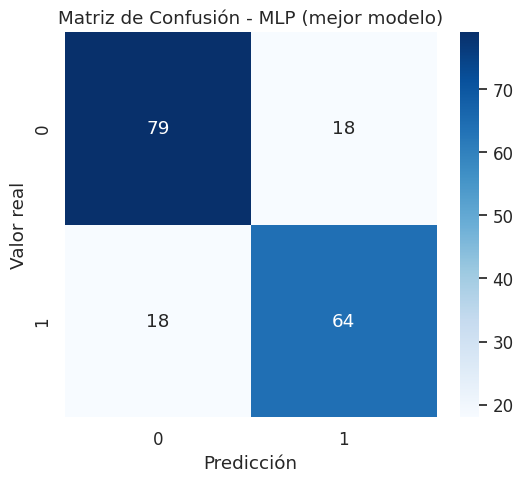

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Pipeline: escalado → MLP
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(max_iter=1000, random_state=42, early_stopping=True))
])

# Parámetros para Grid Search
param_grid = {
    "mlp__hidden_layer_sizes": [(8,), (32,), (64,), (16,8), (64,32)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.0001, 0.001, 0.01],          # regularización L2
    "mlp__learning_rate": ["constant", "adaptive"]
}

# Grid Search con 5-fold cross validation
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Entrenar
grid.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)
print("\nMejor accuracy en validación cruzada:")
print(grid.best_score_)

# Evaluación en el set de test
y_pred = grid.predict(X_test)

print("\nAccuracy en test:")
print(accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# ----------- MATRIZ DE CONFUSIÓN -------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - MLP (mejor modelo)")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()


# Comparativa de Modelos de Clasificación

## 1. Regresión Logística

- **Rendimiento General (Accuracy en Test):** 83%  
- **Clase Maligna (1) en Test:** Precision 0.78, Recall 0.87, F1-score 0.82  
- **Falsos Negativos (FN):** 11  
- **Falsos Positivos (FP):** 20  

**Análisis:**  
Este modelo mostró el mejor rendimiento general, especialmente destacable por su alto recall (0.87) para la clase maligna y la menor cantidad de Falsos Negativos. En un contexto médico, minimizar los FN (no detectar un caso maligno) es crucial, lo que lo convierte en el modelo más adecuado para este problema.

---

## 2. kNN (por defecto, k=5)

- **Rendimiento General (Accuracy en Test):** 77%  
- **Clase Maligna (1) en Test:** Precision 0.73, Recall 0.80, F1-score 0.76  
- **Falsos Negativos (FN):** 16  
- **Falsos Positivos (FP):** 25  

**Análisis:**  
Con los parámetros por defecto, kNN tuvo un rendimiento inferior a la Regresión Logística, con una menor accuracy y recall para la clase maligna, y más Falsos Negativos y Falsos Positivos.

---

## 3. kNN (tuneado, k=17)

- **Rendimiento General (Accuracy en Test):** 80%  
- **Clase Maligna (1) en Test:** Precision 0.76, Recall 0.82, F1-score 0.79  
- **Falsos Negativos (FN):** 15  
- **Falsos Positivos (FP):** 21  

**Análisis:**  
El tuneo del hiperparámetro **n_neighbors** mejoró el rendimiento del kNN significativamente, reduciendo los FN y FP, y aumentando la accuracy y el recall en comparación con la versión por defecto. Sin embargo, no logró superar a la Regresión Logística en las métricas clave para la clase maligna.

---

## 4. Red Neuronal Multicapa (MLP)

- **Rendimiento General (Accuracy en Test):** 80%  
- **Clase Maligna (1) en Test:** Precision 0.78, Recall 0.78, F1-score 0.78  
- **Falsos Negativos (FN):** 18  
- **Falsos Positivos (FP):** 18  

**Análisis:**  
El MLP, aunque con un accuracy similar al kNN tuneado, presentó un recall para la clase maligna ligeramente inferior (0.78) en comparación con la Regresión Logística (0.87) y el kNN tuneado (0.82), lo que resultó en una mayor cantidad de Falsos Negativos.

---

# Mejor Modelo en General

El **Modelo de Regresión Logística** fue el de mejor rendimiento para este dataset, especialmente considerando la criticidad de los Falsos Negativos en un diagnóstico médico. Su equilibrio entre recall y precision para la clase *Maligno* y su menor tasa de FN lo hacen la elección más robusta y segura para este problema.

---

# Casos Especiales y Consideraciones

### 🔹 Prioridad Clínica  
En aplicaciones médicas como la detección de masas mamarias, el costo de un Falso Negativo (no detectar una condición maligna) es mucho mayor que el de un Falso Positivo (diagnosticar erróneamente una condición benigna).  
Por ello, un modelo con **alto recall para la clase positiva (maligna)**, como la Regresión Logística, es preferible, incluso si su precision no es la más alta.

### 🔹 Complejidad del Modelo  
La Regresión Logística es un modelo lineal y más interpretable, lo cual es una ventaja en entornos donde la explicación del diagnóstico es importante.  
Los modelos más complejos como el MLP pueden ofrecer flexibilidad pero requieren más datos y un ajuste cuidadoso para superar a modelos más simples.

### 🔹 Tuneo de Hiperparámetros  
El ejemplo del kNN tuneado demuestra la importancia del ajuste de hiperparámetros.  
Un modelo que inicialmente no es el mejor puede mejorar sustancialmente con un tuneo adecuado, aunque no siempre superará a otros modelos más intrínsecamente adecuados para la estructura de los datos.


# BONUS 2

Si su dataset estaba desbalanceado, puebe utilizar alguna técnica para lidiar con el desbalance de clases durante el entrenamiento.

1) Ofrezca una comparativa de entrenar y evaluar modelos de Logistic regression con y sin class_weight='balanced' o el modelo SVC con y sin class_weight='balanced'

2) Pruebe entrenar KNN con y sin uso de SMOTE

( Ver apunte sobre Desbalance de clases de la cátedra )



##Fuentes:
Tomé referencias de lo trabajado en clase, recomendaciones del coloquio, revisiones de tp anteriores, ChatGPT para aprender el contexto del dataset y la realización de gráficos modernos y Gemini en Colab para escritura de código general.